# Practice Activity - Keras Neural Networks
## Nick Bias
### 5/13/22
## Goal: Predict Penguin Species
### Libraries 

In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
size = pd.read_csv("/content/penguins_size.csv")

# Drop Rows with NA values 
clean = size.dropna()

# Drops row with a '.' for the Sex Variable
clean = clean[clean['sex'] != '.']
# only 11 rows were dropped 

# Creating Dummy Variables for Island and Sex
island = pd.get_dummies(clean['island'])
sex = pd.get_dummies(clean['sex'])

# Merging with Original Data
penguins = pd.merge(clean, island, left_index=True, right_index=True)
penguins = pd.merge(penguins, sex, left_index=True, right_index=True)

# Dropping Columns that the Dummies were made from 
penguins = penguins.drop(['sex', 'island', 'FEMALE'], axis = 1)
penguins

### Splitting Prediction Variable from dataset
- X = Dataset with all Independent Variables 
- y = The Dependent Variable of Penguin Species

In [30]:
penguins_x = penguins.iloc[:,1:]
x = penguins_x.values

# RUn MinMAx scaler on data to help with analysis
min_max_scaler = preprocessing.MinMaxScaler()
scaled_penguins_x = pd.DataFrame(min_max_scaler.fit_transform(x), columns=penguins_x.columns)
scaled_penguins_x

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Biscoe,Dream,Torgersen,MALE
0,0.254545,0.666667,0.152542,0.291667,0.0,0.0,1.0,1.0
1,0.269091,0.511905,0.237288,0.305556,0.0,0.0,1.0,0.0
2,0.298182,0.583333,0.389831,0.152778,0.0,0.0,1.0,0.0
3,0.167273,0.738095,0.355932,0.208333,0.0,0.0,1.0,0.0
4,0.261818,0.892857,0.305085,0.263889,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
328,0.549091,0.071429,0.711864,0.618056,1.0,0.0,0.0,0.0
329,0.534545,0.142857,0.728814,0.597222,1.0,0.0,0.0,0.0
330,0.665455,0.309524,0.847458,0.847222,1.0,0.0,0.0,1.0
331,0.476364,0.202381,0.677966,0.694444,1.0,0.0,0.0,0.0


In [31]:
penguins_y = penguins['species']
print(penguins_y)
penguins_y = penguins_y.astype('category').cat.codes.to_numpy()
penguins_y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

## Models

In [32]:
# Test model
inputs = keras.Input(shape=(8,)) #number of variables 
x = layers.Dense(50, activation = 'relu')(inputs) # single hidden layer with 50 nodes
x = layers.Dense(40, activation = 'sigmoid')(x)
outputs = layers.Dense(3, activation='sigmoid')(x) #dense means fully connected. 3 different classes
model = keras.Model(inputs=inputs, outputs=outputs, name="penguin_model")

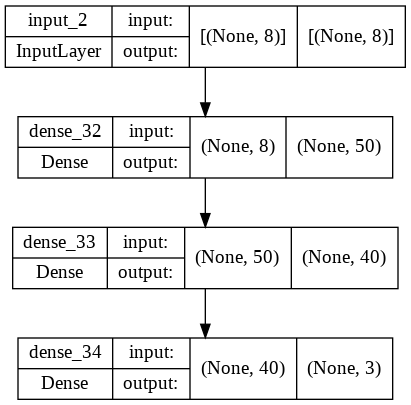

In [33]:
keras.utils.plot_model(model, show_shapes = True)

In [34]:
model_scaled = keras.Model(inputs=inputs, outputs=outputs, name="penguin_model_scaled")

model_scaled.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history_scaled = model_scaled.fit(scaled_penguins_x, penguins_y, batch_size = 64, epochs = 10, validation_split = 0.1)

scores = model_scaled.evaluate(scaled_penguins_x, penguins_y, verbose = 2)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 1s 47ms/step - loss: 1.4605 - accuracy: 0.2274 - val_loss: 1.4473 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 1.2686 - accuracy: 0.2274 - val_loss: 1.3091 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 1.1628 - accuracy: 0.2274 - val_loss: 1.2263 - val_accuracy: 0.0000e+00
Epoch 4/10
1/5 [=====>........................] - ETA: 0s - loss: 1.1280 - accuracy: 0.1562

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 0s 10ms/step - loss: 1.0905 - accuracy: 0.2241 - val_loss: 1.1740 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 1.0389 - accuracy: 0.2609 - val_loss: 1.0838 - val_accuracy: 0.2353
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 0.9968 - accuracy: 0.4849 - val_loss: 1.0460 - val_accuracy: 0.5294
Epoch 7/10
5/5 [==============================] - 0s 12ms/step - loss: 0.9594 - accuracy: 0.6421 - val_loss: 1.0039 - val_accuracy: 0.5588
Epoch 8/10
5/5 [==============================] - 0s 8ms/step - loss: 0.9273 - accuracy: 0.7324 - val_loss: 0.9653 - val_accuracy: 0.6765
Epoch 9/10
5/5 [==============================] - 0s 7ms/step - loss: 0.8969 - accuracy: 0.7358 - val_loss: 0.9001 - val_accuracy: 1.0000
Epoch 10/10
5/5 [==============================] - 0s 6ms/step - loss: 0.8688 - accuracy: 0.7592 - val_loss: 0.8272 - val_accuracy: 1.0000
11/11 - 0s - loss: 0.8469 - accuracy: 

As we can see the model discussed in class is only 60% accurate. This is not a good model and will need further tunning.

## Old Models 

In [35]:
# Creating testing and training datasets from scaled data
X_train,X_test,y_train,y_test = train_test_split(scaled_penguins_x, penguins_y,test_size = 0.1)

In [36]:
# used so it will not print all epochs
class Callback(tf.keras.callbacks.Callback):
    SHOW_NUMBER = 10
    counter = 0
    epoch = 0

In [37]:
# Base Model
model = Sequential()
model.add(Dense(100, input_dim=8, activation='relu')) # Default activation is relu
model.add(Dense(3, activation='softmax'))

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Default solver is adam

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001), #default learning rate = 0.001
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

history_scaled = model.fit(scaled_penguins_x, penguins_y, batch_size = 64, epochs = 20, validation_split = 0.1, use_multiprocessing=True, callbacks=[Callback()], verbose=0) # default max iterations are 200
test_scores = model.evaluate(scaled_penguins_x, penguins_y, verbose = 2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11/11 - 0s - loss: 0.4076 - sparse_categorical_accuracy: 0.9850 - 22ms/epoch - 2ms/step
Test loss: 0.40759629011154175
Test accuracy: 0.9849849939346313


Last Practice Activity this same model achieved an accurcy score of 43.28% using MLPClassifier. Now it is at 98.5%. This is a 55% increase in accuracy. This model does not even have as many iterations as the original did last PA, yet it is still performing better.

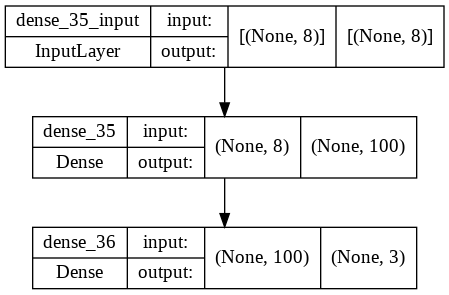

In [38]:
keras.utils.plot_model(model, show_shapes = True)

This model only has 1 hidden 'relu' layer with 100 nodes. This is the default MLP Classifier. 

In [39]:
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

1/1 [==============================] - 0s 54ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        15

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [40]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

print(metrics.confusion_matrix(y_test, y_pred))

[[14  0  0]
 [ 0  5  0]
 [ 0  0 15]]


We can see that the model is performing at 100% accuracy. The Precision and Recall are also 100% meaning that everything in the data is being perfectly classified.

In [41]:
# Model 2
model = Sequential()
model.add(Dense(5, input_dim=8, activation='relu')) # Default activation is relu
model.add(Dense(2, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001), #default learning rate = 0.001
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

history_scaled = model.fit(scaled_penguins_x, penguins_y, batch_size = 64, epochs = 200, validation_split = 0.1, use_multiprocessing=True, callbacks=[Callback()], verbose=0) # default max iterations are 200

test_scores = model.evaluate(scaled_penguins_x, penguins_y, verbose = 1)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11/11 [==============================] - 0s 2ms/step - loss: 0.5528 - sparse_categorical_accuracy: 0.9069
Test loss: 0.5527802109718323
Test accuracy: 0.9069069027900696


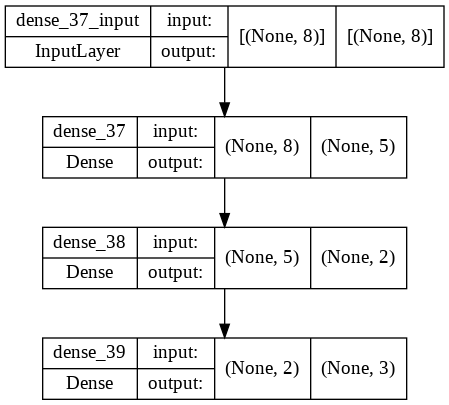

In [42]:
keras.utils.plot_model(model, show_shapes = True)

Model 2 has 2 hidden layers with only 5 nodes in the first one and 2 in the second.

In [43]:
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

1/1 [==============================] - 0s 46ms/step
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00        15

    accuracy                           0.94        34
   macro avg       0.96      0.87      0.89        34
weighted avg       0.95      0.94      0.94        34



In [44]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

print(metrics.confusion_matrix(y_test, y_pred))

[[14  0  0]
 [ 2  3  0]
 [ 0  0 15]]


Model 2 only achieved an accuracy score of 94%. This is a 62% increase compared to the MLP Classifier that achieved 32.84% accuracy. We can also see that the Precision for Class 0 is only 88%. This is ok. Recall for Class 1 is 60%. This means only 60% of class 1 were identified correctly. This is rather low. We will explore other models.

In [45]:
# Model 3 (400,100,50,5)
model = Sequential()
model.add(Dense(400, input_dim=8, activation='relu')) 
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001), #default learning rate = 0.001
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

history_scaled = model.fit(scaled_penguins_x, penguins_y, batch_size = 64, epochs = 20, validation_split = 0.1, use_multiprocessing=True, callbacks=[Callback()], verbose=0) # default max iterations are 200

test_scores = model.evaluate(scaled_penguins_x, penguins_y, verbose = 2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11/11 - 0s - loss: 0.0181 - sparse_categorical_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Test loss: 0.018064694479107857
Test accuracy: 1.0


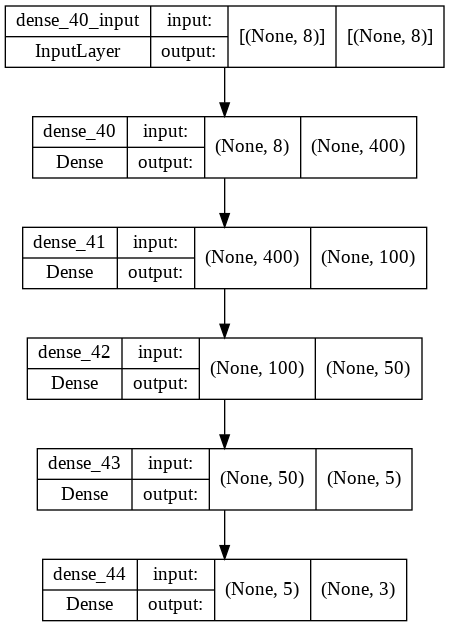

In [46]:
keras.utils.plot_model(model, show_shapes = True)

Model 3 had 4 hidden layers with 400 nodes in the first layer, 100 in the second, 50 in the third and 5 in the fourth.

In [47]:
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

1/1 [==============================] - 0s 66ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        15

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [48]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

print(metrics.confusion_matrix(y_test, y_pred))

[[14  0  0]
 [ 0  5  0]
 [ 0  0 15]]


This model also achieved a 100% accuracy, recall and presicion. This means the model is performing perfectly. This is a 75% increase compared to the 25% accuracy the MLP Classifier achieved last week. 

## New Models

In [68]:
model = Sequential()
model.add(Dense(100, input_dim=8, activation='sigmoid'))
model.add(Dense(12, kernel_initializer='uniform', activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(learning_rate=1),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

history_scaled = model.fit(scaled_penguins_x, penguins_y, batch_size = 64, epochs = 20, validation_split = 0.1, use_multiprocessing=True, callbacks=[Callback()], verbose=0) # default max iterations are 200

test_scores = model.evaluate(scaled_penguins_x, penguins_y, verbose = 2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11/11 - 0s - loss: 2.2632 - sparse_categorical_accuracy: 0.3574 - 23ms/epoch - 2ms/step
Test loss: 2.263153314590454
Test accuracy: 0.35735735297203064


Sigmoid activation seems to drastically decrease model accuracy. It also seems to prevent it from getting any better. The accuracy stayed at 49% after each iteration, while other models would progressively get better.

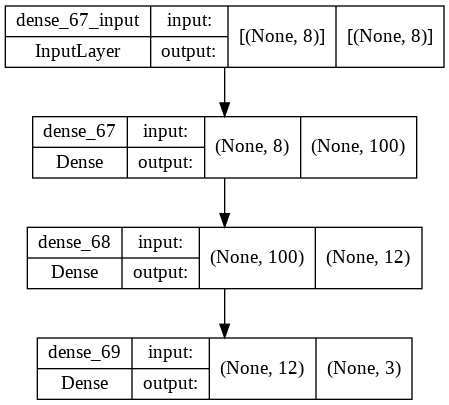

In [69]:
keras.utils.plot_model(model, show_shapes = True)

In [50]:
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

1/1 [==============================] - 0s 47ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00         5
           2       0.44      1.00      0.61        15

    accuracy                           0.44        34
   macro avg       0.15      0.33      0.20        34
weighted avg       0.19      0.44      0.27        34



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

print(metrics.confusion_matrix(y_test, y_pred))

[[ 0  0 14]
 [ 0  0  5]
 [ 0  0 15]]


This model used a sigmoid activiation function for each layer. This makes the data folloow an S shaped or sigmoid shaped curve. This made the model perform horribly. Class 2 was the only speicies that was correctly identified. Sigmoid is not the correct activation function for this problem. This also uses the RMS prop function.

In [70]:
model = Sequential()
model.add(Dense(100, input_dim=8, activation='relu'))
model.add(Dense(120, activation='sigmoid'))
model.add(Dense(200, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

history_scaled = model.fit(scaled_penguins_x, penguins_y, batch_size = 64, epochs = 20, validation_split = 0.1, use_multiprocessing=True, callbacks=[Callback()], verbose=0) # default max iterations are 200

test_scores = model.evaluate(scaled_penguins_x, penguins_y, verbose = 2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11/11 - 0s - loss: 0.1539 - sparse_categorical_accuracy: 0.9970 - 45ms/epoch - 4ms/step
Test loss: 0.15385624766349792
Test accuracy: 0.9969969987869263


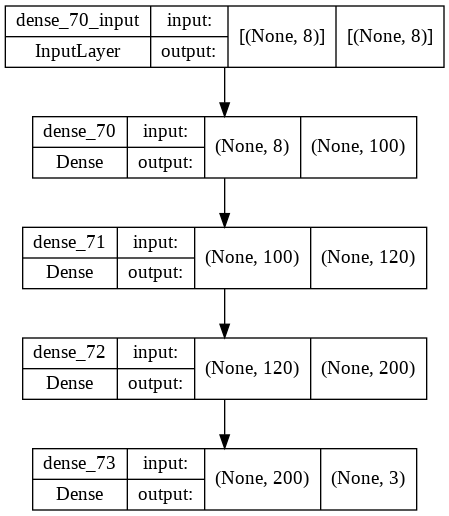

In [71]:
keras.utils.plot_model(model, show_shapes = True)

In [53]:
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

1/1 [==============================] - 0s 48ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        15

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [54]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

print(metrics.confusion_matrix(y_test, y_pred))

[[14  0  0]
 [ 0  5  0]
 [ 0  0 15]]


This model had 3 hidden layers and switched from relu activation to sigmoid, back to relu. I wanted to see if this would make a noticable difference. The model ended up achieving a perfect score. This also uses the RMS prop function.

In [72]:
model = Sequential()
model.add(Dense(100, input_dim=8, activation='sigmoid'))
model.add(Dense(400, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)
#optimizer=keras.optimizers.Adam(learning_rate=0.001),
history_scaled = model.fit(scaled_penguins_x, penguins_y, batch_size = 64, epochs = 20, validation_split = 0.1, use_multiprocessing=True, callbacks=[Callback()], verbose=0) # default max iterations are 200

test_scores = model.evaluate(scaled_penguins_x, penguins_y, verbose = 2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11/11 - 0s - loss: 0.7407 - sparse_categorical_accuracy: 0.7778 - 41ms/epoch - 4ms/step
Test loss: 0.7407179474830627
Test accuracy: 0.7777777910232544


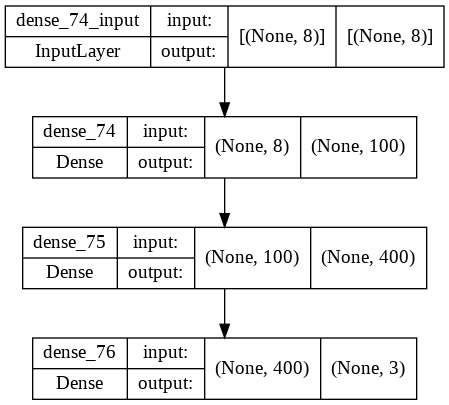

In [73]:
keras.utils.plot_model(model, show_shapes = True)

In [56]:
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

1/1 [==============================] - 0s 65ms/step
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        14
           1       0.00      0.00      0.00         5
           2       0.75      1.00      0.86        15

    accuracy                           0.71        34
   macro avg       0.46      0.55      0.50        34
weighted avg       0.60      0.71      0.64        34



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

print(metrics.confusion_matrix(y_test, y_pred))

[[ 9  0  5]
 [ 5  0  0]
 [ 0  0 15]]


This model once again uses the sigmoid activation function. However, this time I wanted to test if adding more nodes in the hidden layers would help boost accuracy. It went up from 44% accuracy to 71%. This is a 27% increase. Adding more nodes in the hidden layers help. 

In [58]:
# Same model as before for smaller batch size
model = Sequential()
model.add(Dense(100, input_dim=8, activation='sigmoid'))
model.add(Dense(400, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

history_scaled = model.fit(scaled_penguins_x, penguins_y, batch_size = 12, epochs = 20, validation_split = 0.1, use_multiprocessing=True, callbacks=[Callback()], verbose=0) # default max iterations are 200
test_scores = model.evaluate(scaled_penguins_x, penguins_y, verbose = 2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11/11 - 0s - loss: 0.2255 - sparse_categorical_accuracy: 0.8559 - 24ms/epoch - 2ms/step
Test loss: 0.22549527883529663
Test accuracy: 0.8558558821678162


In [59]:
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

1/1 [==============================] - 0s 47ms/step
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.62      1.00      0.77         5
           2       1.00      1.00      1.00        15

    accuracy                           0.91        34
   macro avg       0.88      0.93      0.88        34
weighted avg       0.94      0.91      0.92        34



In [60]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

print(metrics.confusion_matrix(y_test, y_pred))

[[11  3  0]
 [ 0  5  0]
 [ 0  0 15]]


This is the same model as the previous one. however, this time I wanted to test a smaller batch size. I decreased it from 64 to 12. Decreasing the batch size seems to increase the model accuracy by 20%. This was very surprising. The model precision for Class 1 is low and recall for class 0 is alright. Overall, there are better models. 

In [65]:
model = Sequential()
model.add(Dense(100, input_dim=8, activation='sigmoid'))
model.add(Dense(12, kernel_initializer='uniform', activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

model.compile(
    loss=keras.losses.KLDivergence(), # usually used for regression
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

history_scaled = model.fit(scaled_penguins_x, penguins_y, batch_size = 64, epochs = 20, validation_split = 0.1, use_multiprocessing=True, callbacks=[Callback()], verbose=0) # default max iterations are 200

test_scores = model.evaluate(scaled_penguins_x, penguins_y, verbose = 2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

11/11 - 0s - loss: 1.8510 - sparse_categorical_accuracy: 0.2342 - 24ms/epoch - 2ms/step
Test loss: 1.8510452508926392
Test accuracy: 0.23423422873020172


In [66]:
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

1/1 [==============================] - 0s 45ms/step
              precision    recall  f1-score   support

           0       0.20      0.36      0.26        14
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        15

    accuracy                           0.15        34
   macro avg       0.07      0.12      0.09        34
weighted avg       0.08      0.15      0.11        34



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

print(metrics.confusion_matrix(y_test, y_pred))

[[ 5  0  9]
 [ 5  0  0]
 [15  0  0]]


This model used the Kullback–Leibler divergence score. This quantifies how much one probability distribution differs from another probability distribution. This did not help model perform. It in fact made it worse. Precision and Recall for Classes 1 and 2 are 0%. This is a bad model and KLDivergence will not be used for this problem.

In [62]:
model = Sequential()
model.add(Dense(100, input_dim=8, activation='relu'))
model.add(Dense(12, kernel_initializer='uniform', activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(
    loss=keras.losses.Poisson(), # usually used for regression
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

history_scaled = model.fit(scaled_penguins_x, penguins_y, batch_size = 64, epochs = 20, validation_split = 0.1, use_multiprocessing=True, callbacks=[Callback()], verbose=0) # default max iterations are 200

test_scores = model.evaluate(scaled_penguins_x, penguins_y)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

11/11 [==============================] - 0s 2ms/step - loss: 1.3429 - sparse_categorical_accuracy: 0.5826
Test loss: 1.3428715467453003
Test accuracy: 0.5825825929641724


In [63]:
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

1/1 [==============================] - 0s 43ms/step
              precision    recall  f1-score   support

           0       0.86      0.43      0.57        14
           1       0.40      0.40      0.40         5
           2       0.64      0.93      0.76        15

    accuracy                           0.65        34
   macro avg       0.63      0.59      0.58        34
weighted avg       0.69      0.65      0.63        34



In [64]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

print(metrics.confusion_matrix(y_test, y_pred))

[[ 6  3  5]
 [ 0  2  3]
 [ 1  0 14]]


This model used Poisson distribution. This is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event. This was not the right function to use as the accurrcy is only 65%. Recall for Class 2 is 94% and that is the only good score that this model achieved.